In [2]:
##########################################################
#  Python script template for Question 3 (IAML Level 10)
#  Note that:
#  - You should not change the name of this file, 'iaml01cw2_q3.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml01cw2_helpers import *
from itertools import accumulate
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

from collections import Counter
Xtrn,Ytrn,Xtst,Ytst = load_CoVoST2('./data')

/home/stas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [4]:
# Q3.1
def iaml01cw2_q3_1():
    kmeans = KMeans(n_clusters=22, random_state=1)
    labels = kmeans.fit_predict(Xtrn)
    inertia = kmeans.inertia_
    print('intertia: ', format(inertia, '.2f'))
    labels_ctr = Counter(labels)
    for i in range(22):
        print(f'{i} & {labels_ctr[i]} \\\\\\hline')
    return kmeans
kmeans = iaml01cw2_q3_1()  

intertia:  38185.82
0 & 1018 \\\hline
1 & 1125 \\\hline
2 & 1191 \\\hline
3 & 890 \\\hline
4 & 1162 \\\hline
5 & 1332 \\\hline
6 & 839 \\\hline
7 & 623 \\\hline
8 & 1400 \\\hline
9 & 838 \\\hline
10 & 659 \\\hline
11 & 1276 \\\hline
12 & 121 \\\hline
13 & 152 \\\hline
14 & 950 \\\hline
15 & 1971 \\\hline
16 & 1251 \\\hline
17 & 845 \\\hline
18 & 896 \\\hline
19 & 930 \\\hline
20 & 1065 \\\hline
21 & 1466 \\\hline


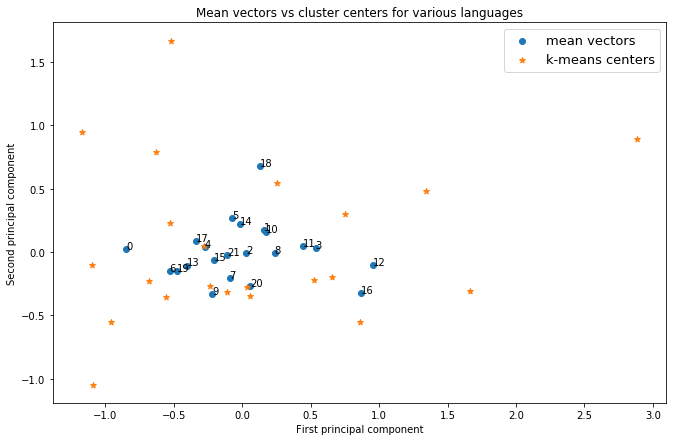

In [21]:
# Q3.2
def get_trn_mean_vs():
    return  np.concatenate([(Xtrn[Ytrn==i].mean(axis=0)).reshape(1,Xtrn.shape[1]) 
                for i in range(22)], axis=0)

def iaml01cw2_q3_2():
    plt.figure(figsize=(11,7))
    mean_vs = get_trn_mean_vs()
    pca = PCA(n_components=2)
    means_pca = pca.fit_transform(mean_vs)
    
    plt.scatter(means_pca[:,0], means_pca[:,1], label='mean vectors')
    centers_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers_pca[:,0], centers_pca[:,1], marker='*', label='k-means centers')
    for i in range(22):
        plt.gca().annotate(str(i), (means_pca[i,0], means_pca[i,1]))
        #plt.gca().annotate(str(i), (centers_pca[i,0], centers_pca[i,1]))
    
    plt.title('Mean vectors vs cluster centers for various languages')
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.legend(fontsize=13)
    plt.savefig('imgs/3_2.png', bbox_inches = 'tight', pad_inches = 0.4)
iaml01cw2_q3_2()   # comment this out when you run the function

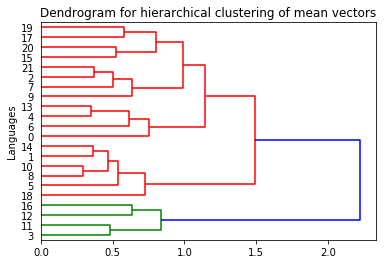

In [24]:
# Q3.3
def iaml01cw2_q3_3():
    mean_vs = get_trn_mean_vs()
    Z = linkage(mean_vs, 'ward')
    dn = dendrogram(Z, orientation='right')
    plt.title('Dendrogram for hierarchical clustering of mean vectors')
    plt.ylabel('Languages')
    plt.savefig('imgs/3_3.png', bbox_inches = 'tight', pad_inches = 0.4)
iaml01cw2_q3_3()   # comment this out when you run the function

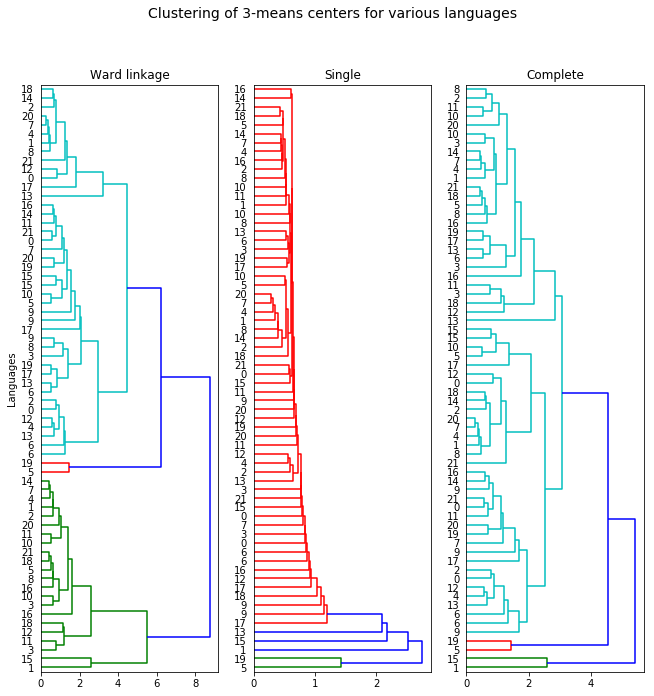

In [46]:
# Q3.4
def iaml01cw2_q3_4():
    centers_alllngs_list = []
    for l in range(22):
        kmeans = KMeans(n_clusters=3, random_state=1)
        Xtrn_l = Xtrn[Ytrn==l]
        labels = kmeans.fit_predict(Xtrn_l)
        centers = kmeans.cluster_centers_
        centers_alllngs_list.append(centers)
    centers_alllngs_mat = np.concatenate(centers_alllngs_list, axis=0)
    fig, ax = plt.subplots(figsize=(18*0.6, 18*0.6), nrows=1, ncols=3)
    
    for i, method in enumerate(['ward', 'single', 'complete']):
        Z = linkage(centers_alllngs_mat, method)
        dendrogram(Z, ax = ax[i], orientation='right',  leaf_font_size = 10, leaf_label_func = lambda x: x//3)
    
    ax[0].set_title('Ward linkage')
    ax[1].set_title('Single')
    ax[2].set_title('Complete')
    ax[0].set_ylabel("Languages")
    fig.suptitle("Clustering of 3-means centers for various languages", fontsize=14)
    plt.savefig('imgs/3_4.png', bbox_inches = 'tight', pad_inches = 0.2)

iaml01cw2_q3_4()   # comment this out when you run the function

 & 1 & 3 & 5 & 10 & 15\\ \hline
Diagonal/Training & 14.28 & 15.40 & 16.03 & 16.87 & 17.67 \\ \hline
Diagonal/Test & 13.84 & 15.04 & 15.86 & 16.45 & 16.82 \\ \hline
Full/Training & 16.39 & 18.00 & 19.05 & 21.08 & 22.89 \\ \hline
Full/Test & 15.81 & 16.89 & 16.88 & 15.52 & 12.04 \\ \hline


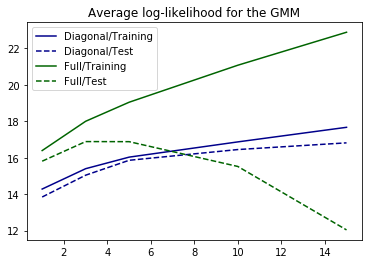

In [45]:
# Q3.5
def iaml01cw2_q3_5():
    Xtrn_l0 = Xtrn[Ytrn==0]
    Xtst_l0 = Xtst[Ytst==0]
    Ks = [1,3,5,10,15]
    tbl_data = np.zeros((2,2,5))
    labels = ['Diagonal/Training', 'Diagonal/Test',
                           'Full/Training','Full/Test']
    for cov_mat_i, cov_mat_type in enumerate(["diag", "full"]):
        avg_ll_trns = []
        avg_ll_tsts = []
        
        for K_i, K in enumerate(Ks):
            gmm = GaussianMixture(n_components=K, covariance_type=cov_mat_type)
            gmm.fit(Xtrn_l0)
            avg_ll_trn = gmm.score(Xtrn_l0)
            avg_ll_tst = gmm.score(Xtst_l0)
            avg_ll_trns.append(avg_ll_trn)
            avg_ll_tsts.append(avg_ll_tst)
            tbl_data[cov_mat_i, 0, K_i] = avg_ll_trn;
            tbl_data[cov_mat_i, 1, K_i] = avg_ll_tst;
        # blue means training, green means test
        # dark means diagonal, light means full
        clr = ['darkblue', 'darkgreen'][cov_mat_i]
        plt.plot(Ks, avg_ll_trns, c=clr, linestyle='-',
                 label=labels[cov_mat_i*2 + 0])
        plt.plot(Ks, avg_ll_tsts, c=clr, linestyle='--',
                 label=labels[cov_mat_i*2 + 1])
    
    tbl_data_2d = [[format(tbl_data[i//2, i%2, j], '.2f')
                    for j in range(5)] for i in range(4)]
    print(' & ' + ' & '.join([str(Ks[i]) for i in range(5)] )+ '\\\\ \\hline')
    for i in range(4):
        label = labels[i]
        print (label + ' & ' 
               + ' & '.join([tbl_data_2d[i][j] for j in range(5)]) + ' \\\\ \\hline')
    
    plt.title('Average log-likelihood for the GMM')
    plt.xlabel('')
    plt.legend()
    plt.savefig('imgs/3_5.png', bbox_inches = 'tight', pad_inches = 0)
    
iaml01cw2_q3_5()   # comment this out when you run the function